# Steps to predict test image part masks

### Prepare environment for prediction

 - Import necessary modules: `sys` and `os`.
 - Define the project's main directory and append it to `sys.path`

In [1]:
import sys
import os

project_main_dir = os.path.abspath('..')
# Add the project's main directory to sys.path
if project_main_dir not in sys.path:
    sys.path.append(project_main_dir)
os.chdir(project_main_dir)

##### import necessary classes

In [2]:
from src.utils.config import InferenceConfig
from src.utils.data_utils import load_concept_hierarchy
from src.inference.image_loader import ImageLoader
from src.inference.classifier import PartClassifier
from src.inference.visualization import MaskVisualizer

##### Initialize the PartClassifier, ImageLoader, and MaskVisualizer

In [3]:
# Note: You can also pass custom configuration to InferenceConfig class
# Example: config = InferenceConfig(input_dir='test_images/', output_dir='output/', threshold=0.5)
config = InferenceConfig()
part_classifier = PartClassifier(config)
visualizer = MaskVisualizer(config)
image_loader = ImageLoader(config)

Using cache found in /home/elenc2/.cache/torch/hub/facebookresearch_dinov2_main
/home/elenc2/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/home/elenc2/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/home/elenc2/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


##### Load images and concept hiararchy

In [4]:
#images_data is a dictionary with image names as keys and image data as values
images_data = image_loader.load_images()

# concept hierarchy is a dictionary with concepts names as keys and list of parts as values
concept_hierarchy = load_concept_hierarchy(f"{config.checkpoint_dir}/concept_hierarchy.pkl")

/shared/nas/data/m1/elenc2/lib/conda/miniconda3/envs/db/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Concept hierarchy loaded from checkpoints_vitl14//concept_hierarchy.pkl


##### load part classifiers and visualize part masks for test images

Loading part classifiers: 100%|██████████| 572/572 [00:00<00:00, 1850.35it/s]


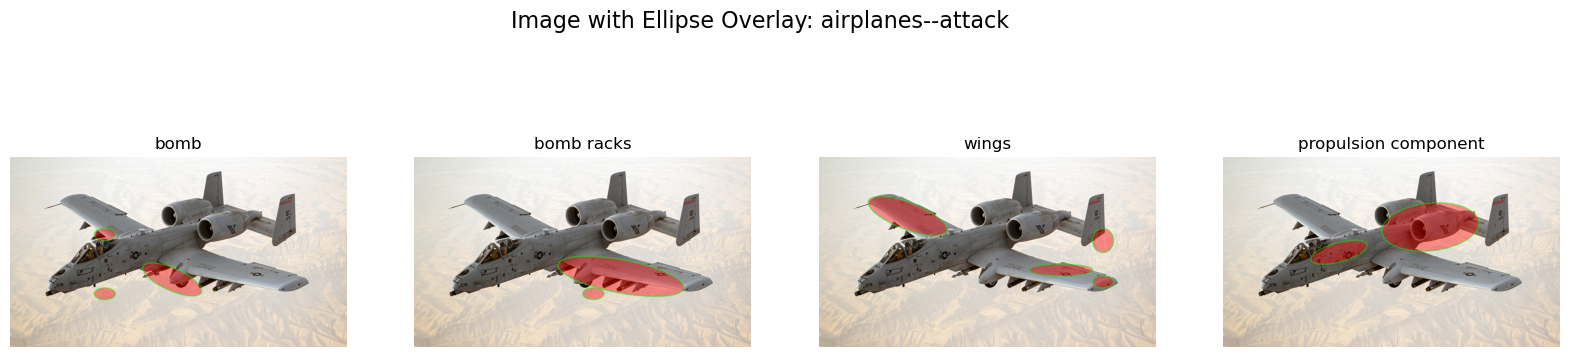

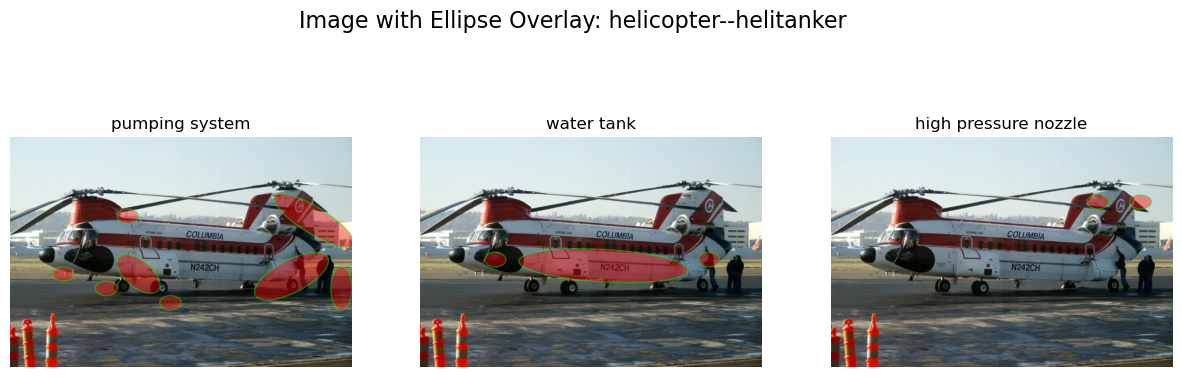

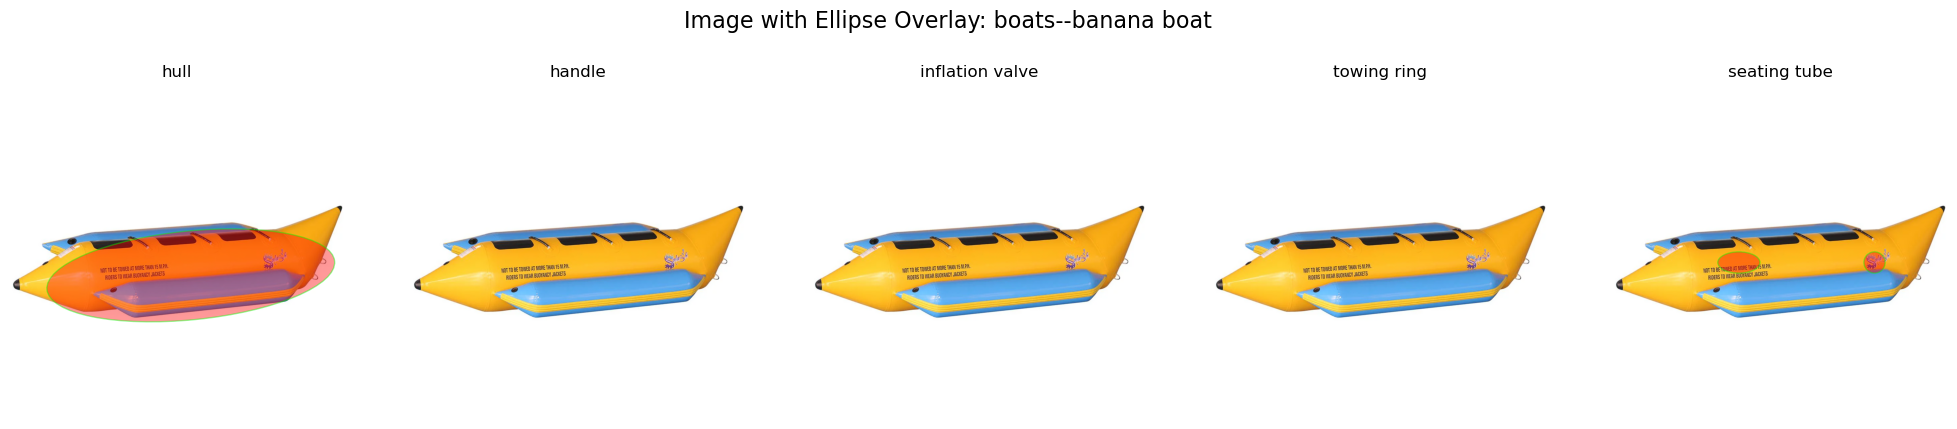

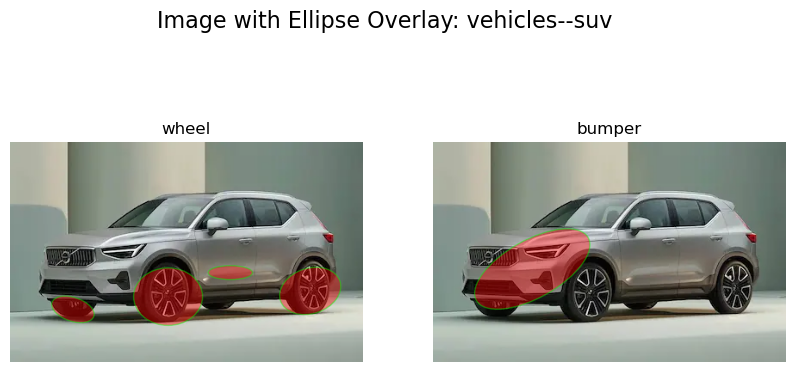

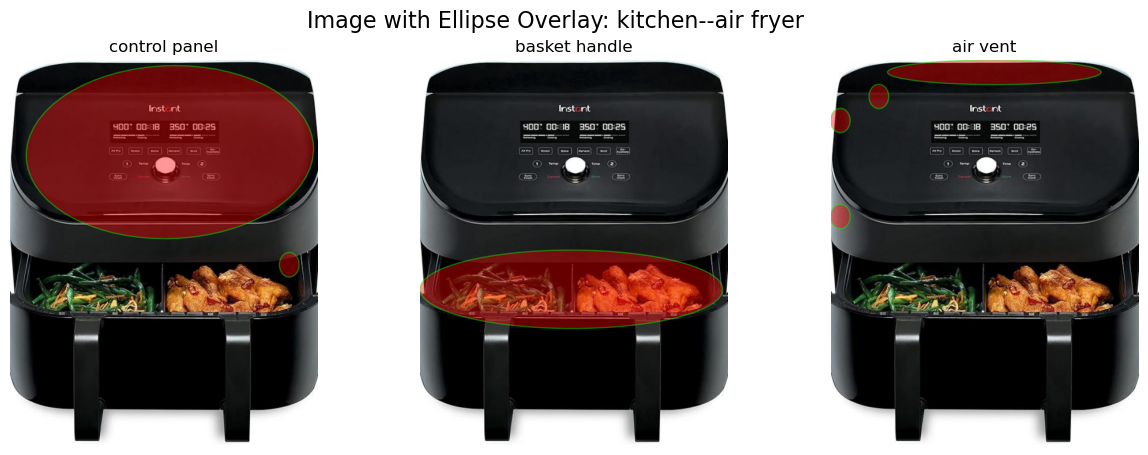

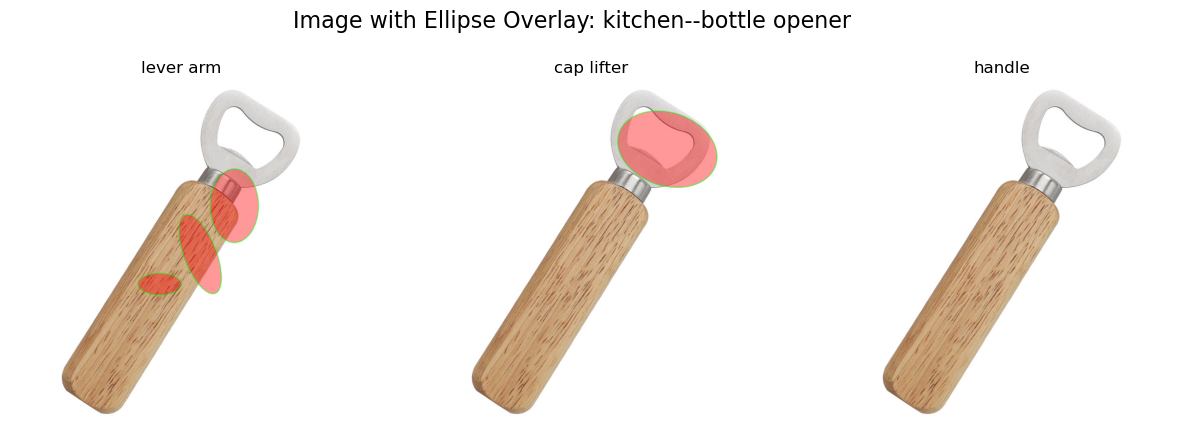

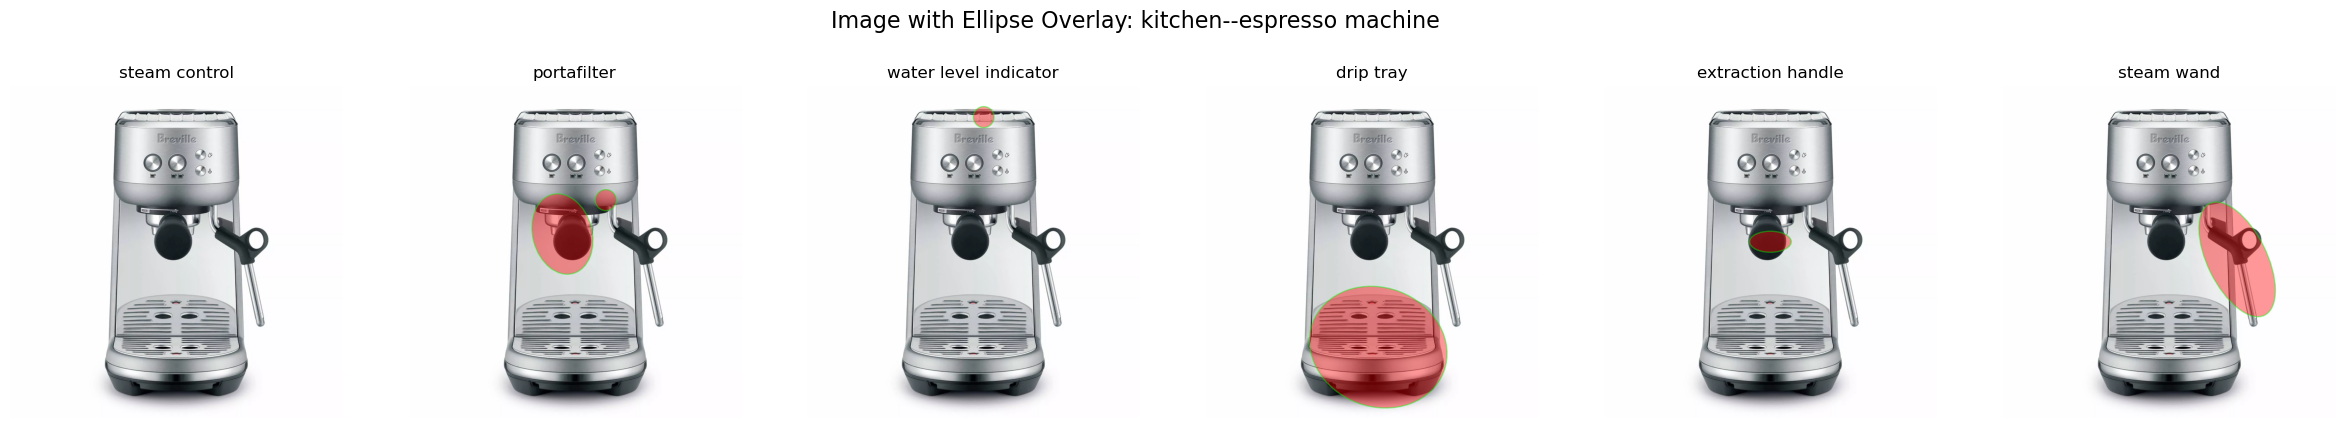

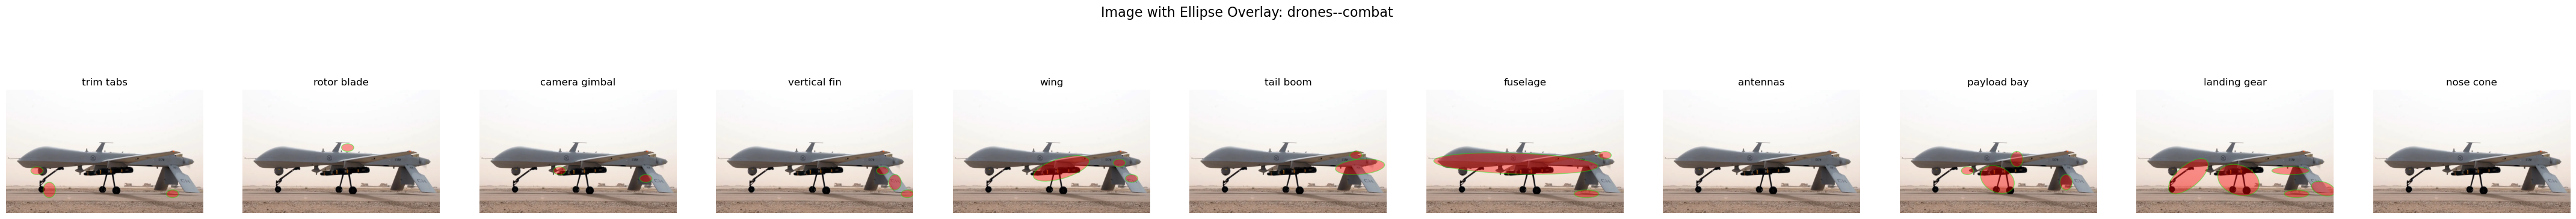

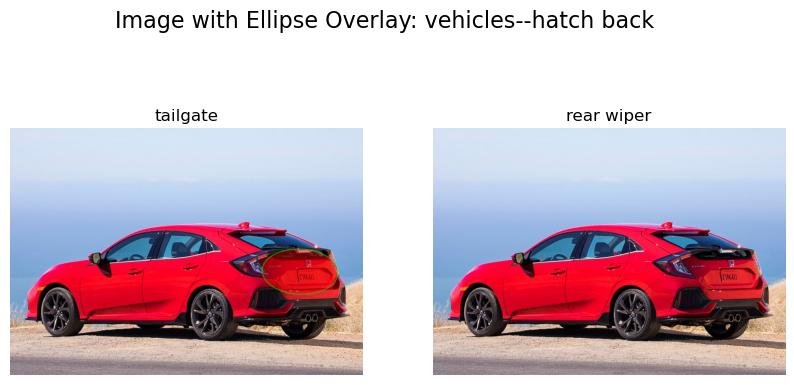

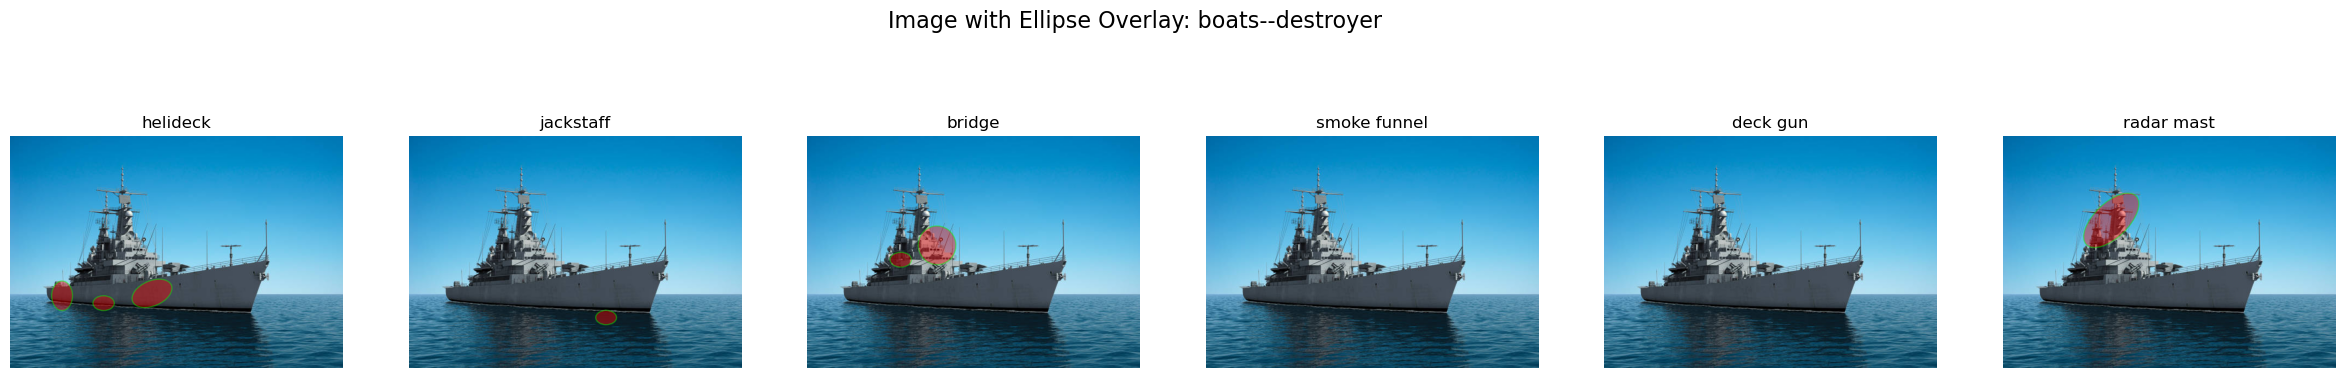

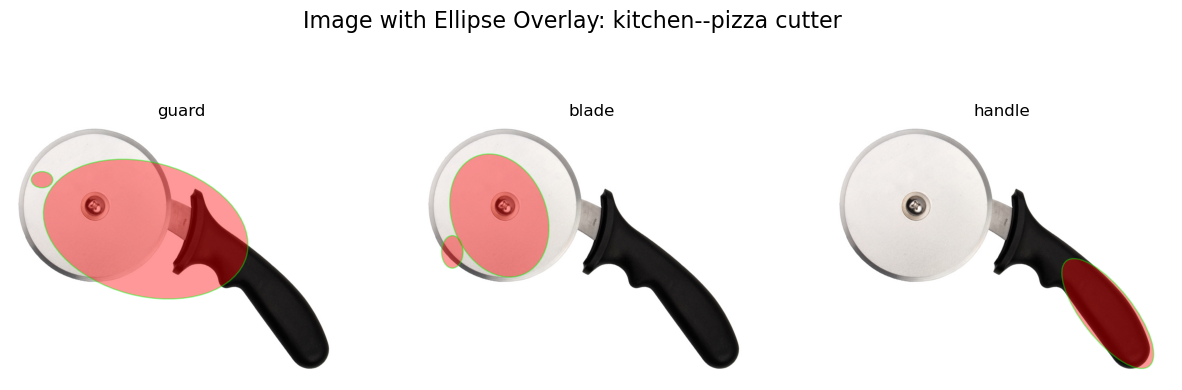

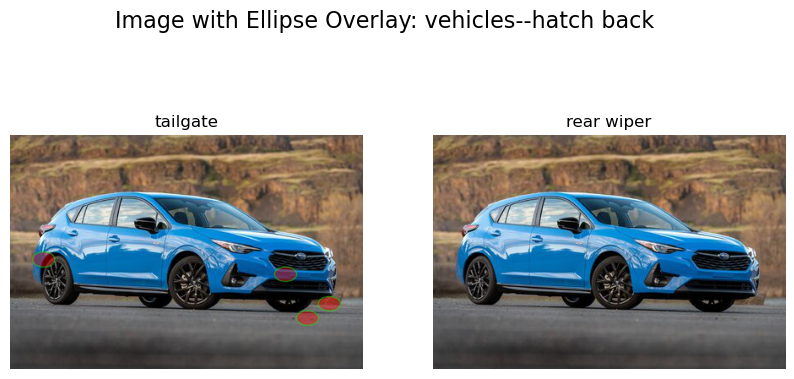

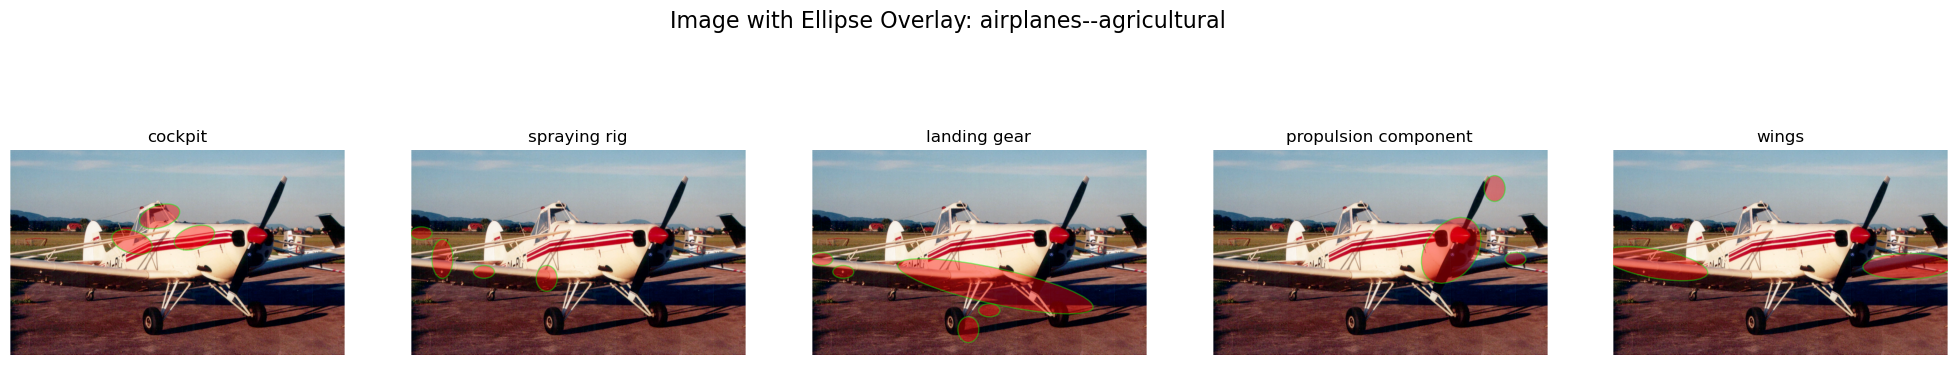

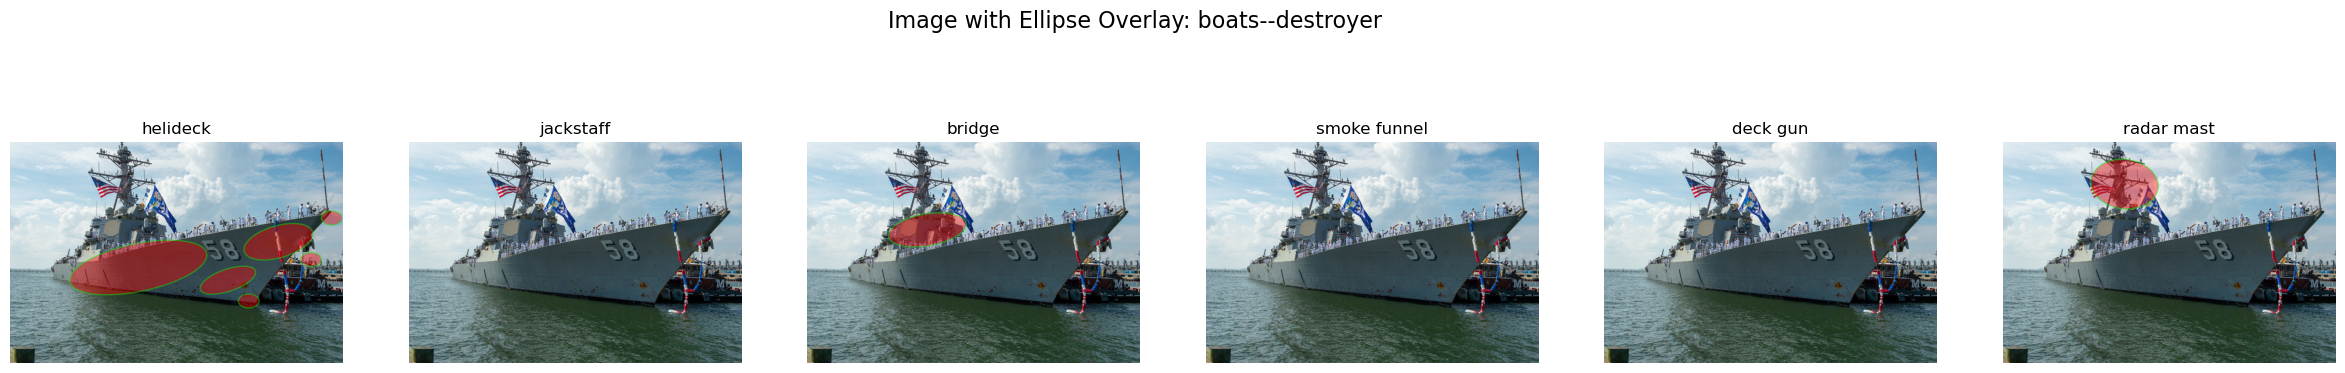

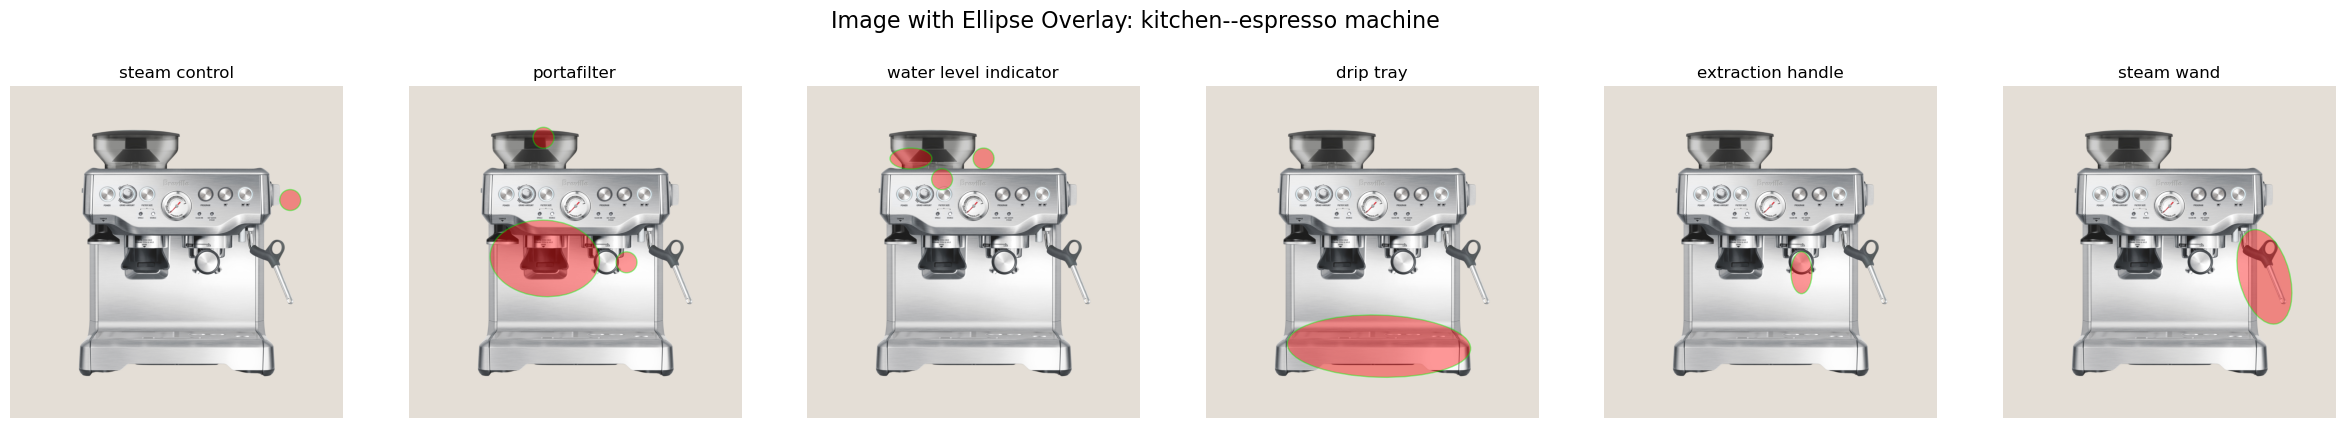

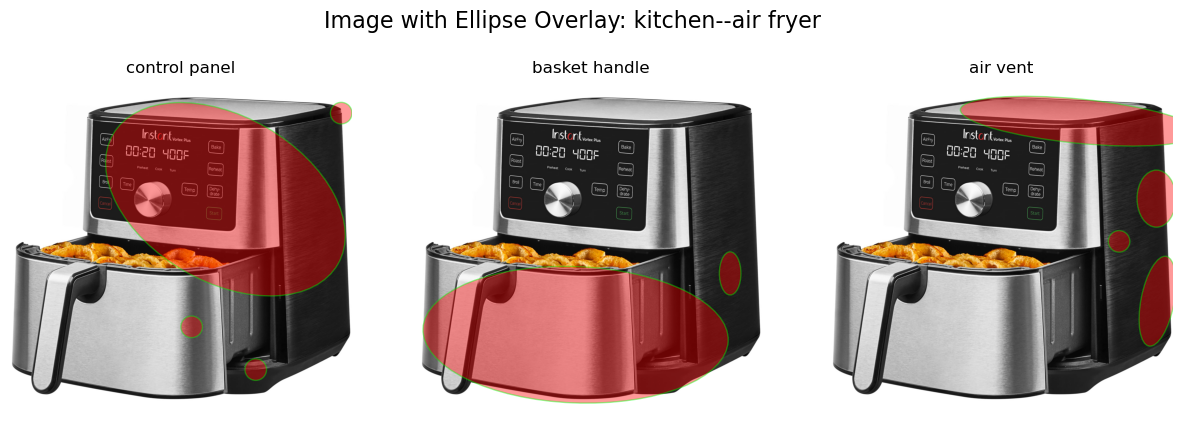

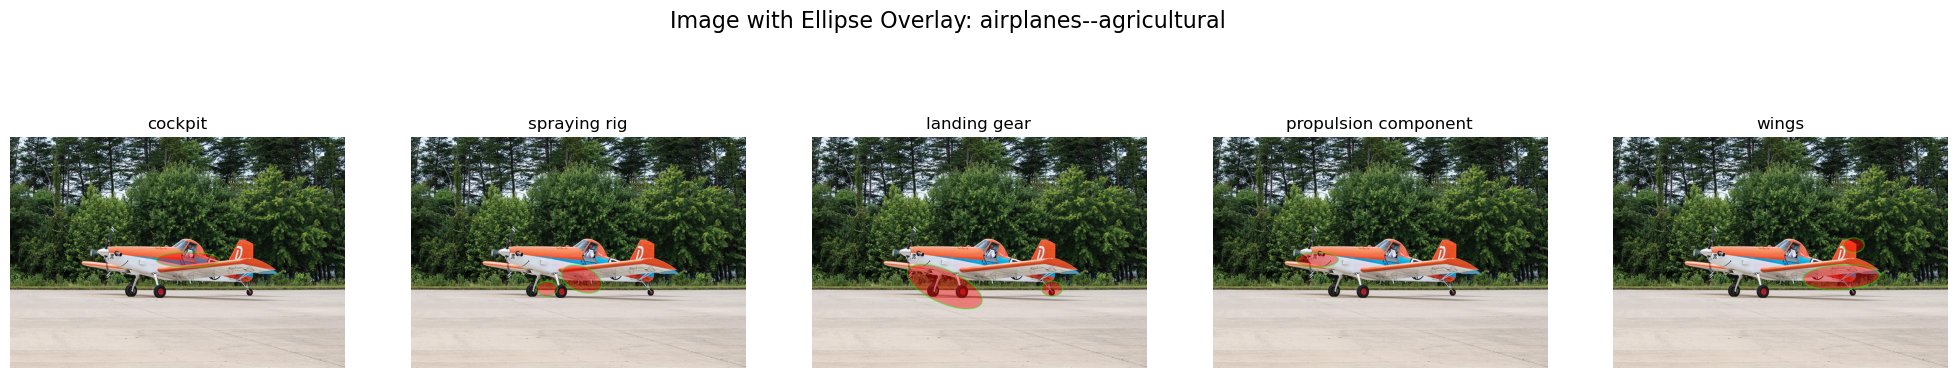

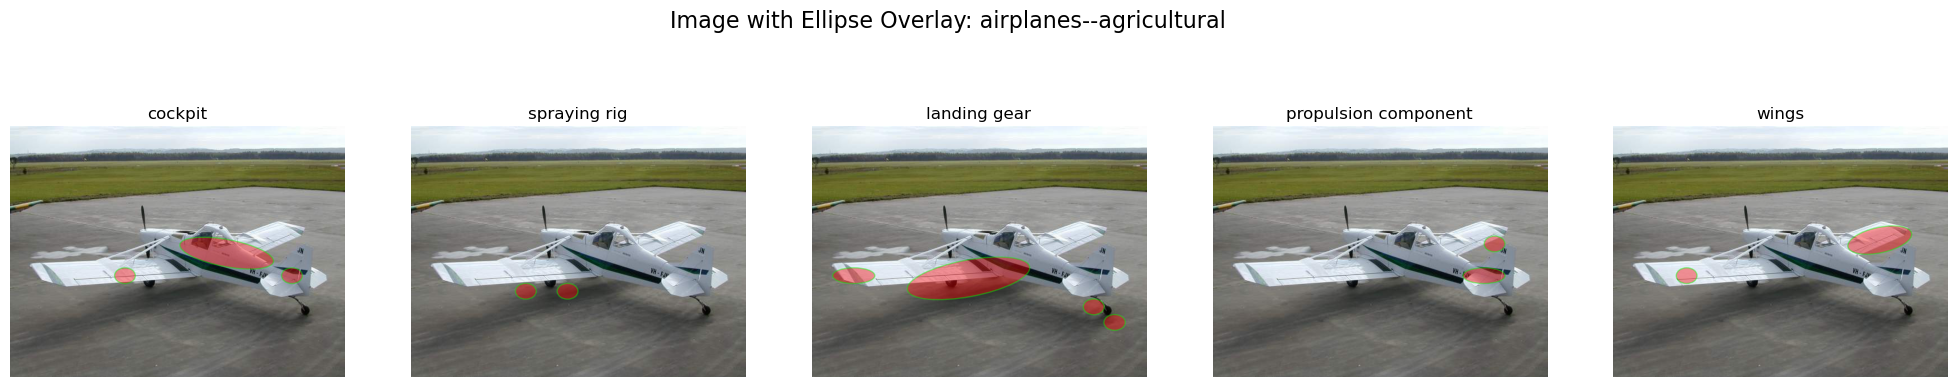

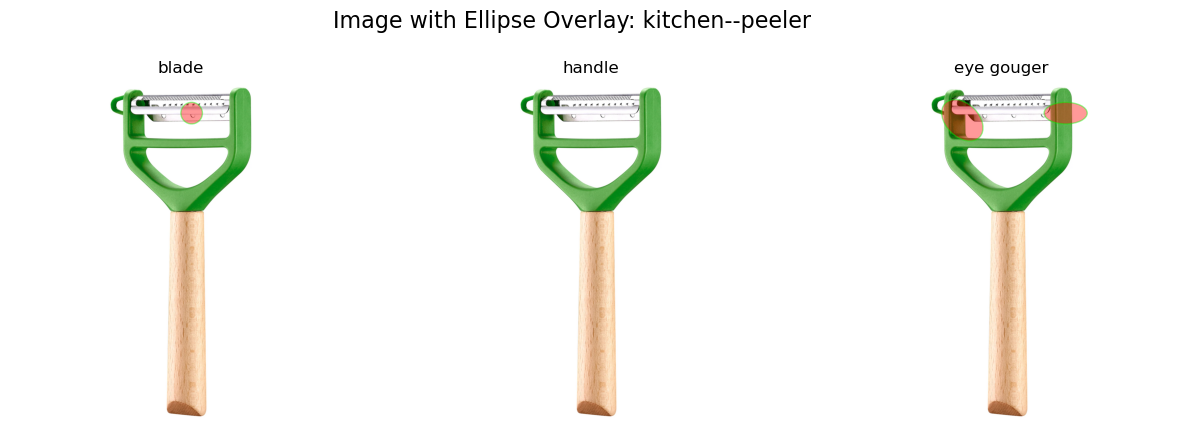

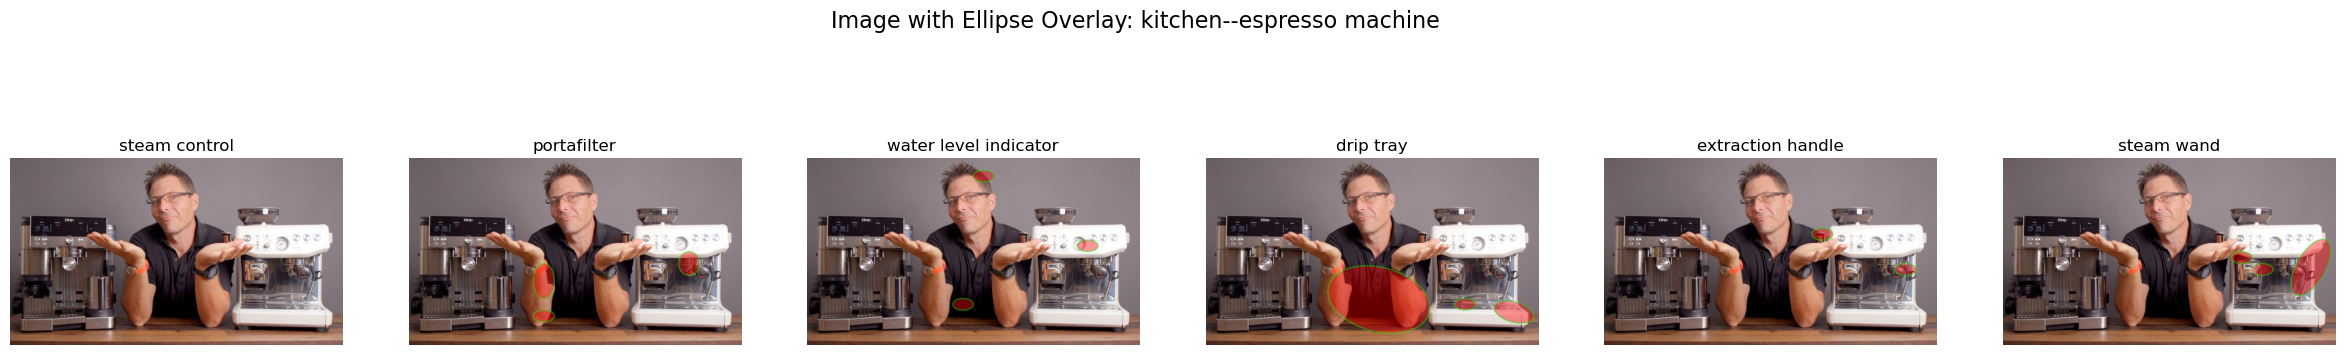

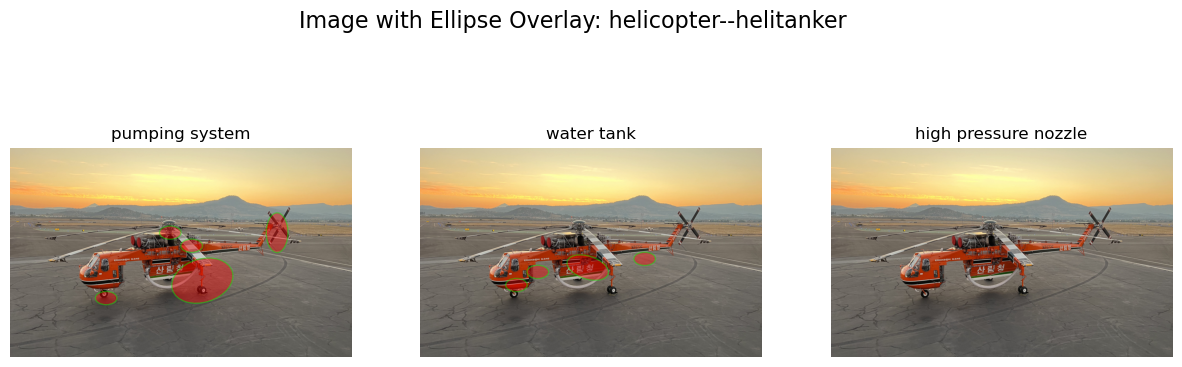

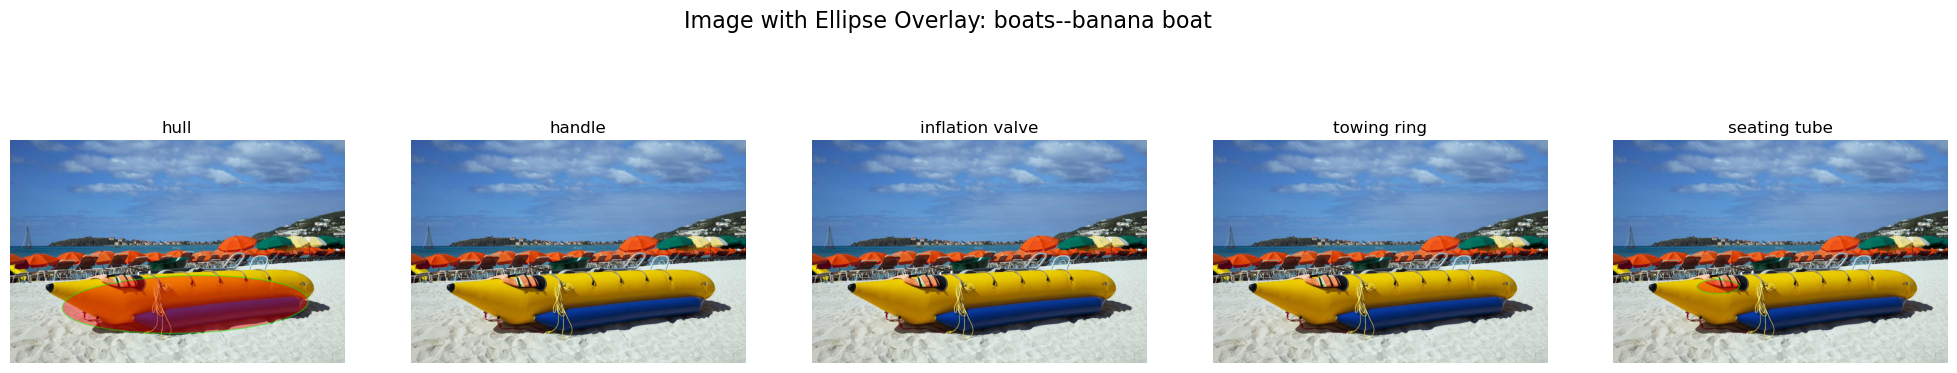

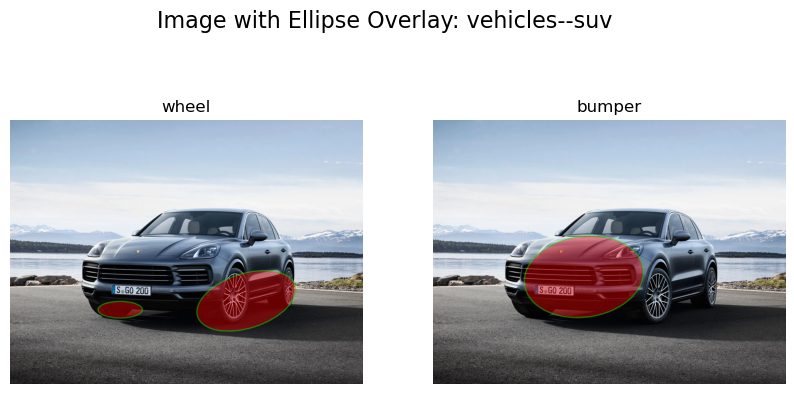

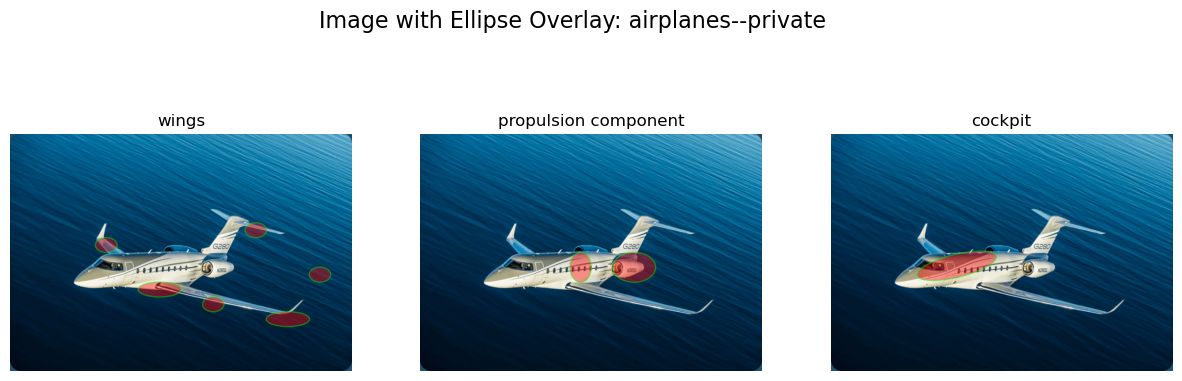

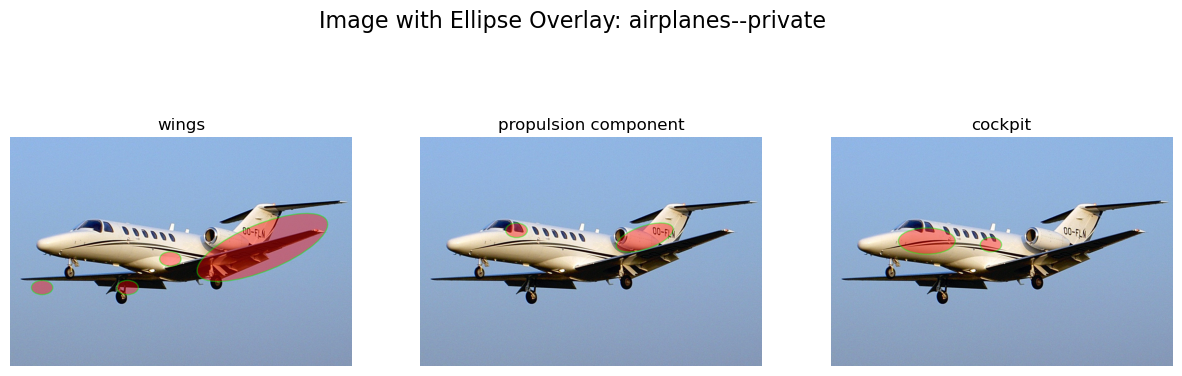

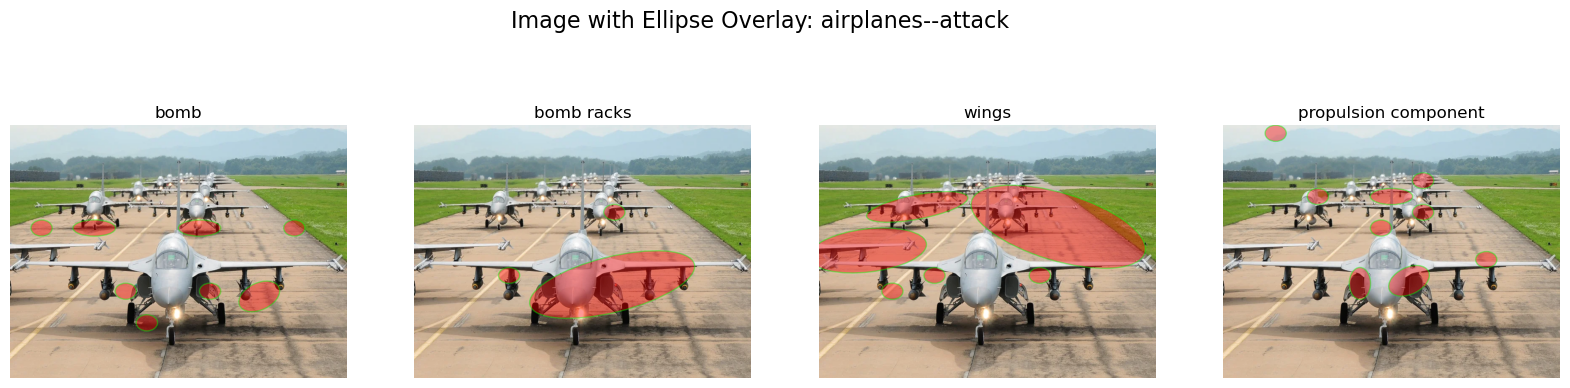

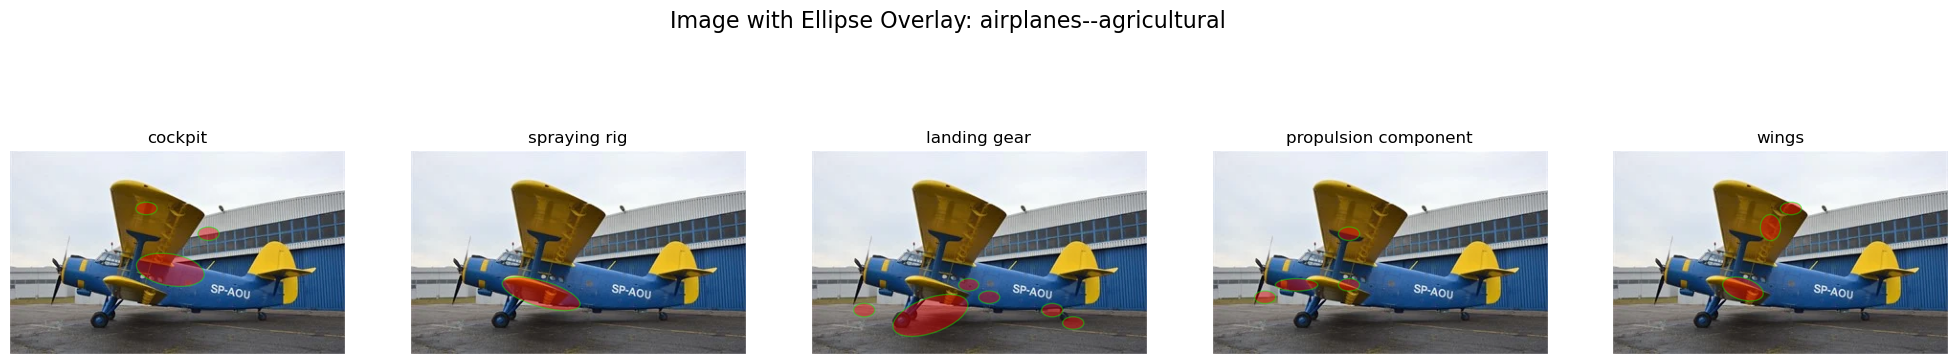

In [5]:
if concept_hierarchy is not None:
    part_classifier.load_part_classifiers(list(concept_hierarchy.keys()))

    for img_name, image_data in images_data.items():
        concept_name = image_data["concept"]
        image = image_data["image"]
        concept_parts = concept_hierarchy[concept_name]
        predicted_masks = part_classifier.classify_parts(image_data, concept_parts)

        visualizer.visualize_part_masks(image, img_name, predicted_masks, concept_name)
else:
    print("No concept hierarchy found!")